In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import math as m

In [ ]:
tf.random.set_seed(1234)

N = 1000

L_ref = 1
#L1 = 0.8
L = 1.0

rho = 1.0
u = 2.5
F = rho*u
gamma = 0.1

c = gamma/F

#r=-1

y_w = 1
#T_inf = 20
y_e = 0

y_ref = 1

epochs = 20000
icount = 1000

x = tf.random.uniform((N,1),0,L,dtype='float64')
#x_2 = tf.random.uniform((N2,1),L1+0.001,L,dtype='float64')

#x = np.vstack([x_1, x_2])


x_bc_w = tf.ones((1,1),dtype = 'float64')*0.0
x_bc_e = tf.ones((1,1),dtype='float64')*L
x_bc = np.vstack([x_bc_w, x_bc_e])
#x_bc = x_bc_w
#y_bc = tf.ones((1,1),dtype = 'float64')*T_w/T_ref
y_bc = np.vstack([tf.ones((1,1),dtype = 'float64')*y_w/y_ref, tf.ones((1,1),dtype = 'float64')*y_e/y_ref])
#print(x)

In [ ]:
def calculate_loss(y_pred,y_actual):
  return tf.norm(y_actual-y_pred,2)/10

In [ ]:
@tf.function
def train_pinn(x):
  with tf.GradientTape(persistent = True) as higher_tape:
    higher_tape.watch(x)
    with tf.GradientTape(persistent=True) as tape:
      tape.watch(x)

      #physics
      y = tf.cast(model(x,training=True),tf.float64)
      dy_dx = tape.gradient(y,x)
      ddy_ddx = tape.gradient(dy_dx,x)
      mul = -1*c*ddy_ddx
      ns_residue = tf.add(dy_dx,mul)
      loss_ns = tf.norm(ns_residue,2)/N

      #boundary condition
      y_bc_pred = tf.cast(model(x_bc,training=True),tf.float64)
      loss_bc = calculate_loss(y_bc_pred,y_bc)

      #loss_ns, loss_bc=0
      total_loss = tf.add(loss_ns,loss_bc)
  grads = tape.gradient(total_loss, model.trainable_weights)
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  return total_loss,loss_ns,loss_bc,ddy_ddx

In [ ]:
nnode = 30
act = 'tanh'


model = tf.keras.Sequential([
    layers.Dense(nnode,input_shape=(1,),activation=act),
    layers.Dense(nnode,activation=act),
    layers.Dense(nnode,activation=act),
    layers.Dense(nnode,activation=act),
    layers.Dense(nnode,activation=act),
    layers.Dense(1,activation=act)
])

#loss_ns,bc_loss = train_pinn(t)
lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000,3000,5000],[1e-2,1e-3,5e-4,1e-4])
optimizer = keras.optimizers.Adam(learning_rate=lr)


In [ ]:
#y_bc = tf.cast(model(tf.ones((1,1),dtype='float64')*0,training=True),tf.float64)
#tf.print(y_bc)

In [ ]:
loss_array = []
print('Epoch    Total loss     NS loss    BC loss')

for epoch in range(epochs):
  total_loss, ns_loss, bc_loss,ddy_ddx = train_pinn(x)
  tl = total_loss.numpy()
  loss_array.append(tl)
  if epoch % icount == 0:
        print('  %d     %.4f       %.4f    %.4f' % (epoch, total_loss, ns_loss, bc_loss))

Epoch    Total loss     NS loss    BC loss
  0     0.1301       0.0173    0.1128
  1000     0.0359       0.0252    0.0107
  2000     0.0102       0.0021    0.0081
  3000     0.0023       0.0004    0.0019
  4000     0.0011       0.0003    0.0008
  5000     0.0010       0.0002    0.0008
  6000     0.0003       0.0002    0.0002
  7000     0.0003       0.0001    0.0002
  8000     0.0003       0.0001    0.0002
  9000     0.0003       0.0001    0.0002
  10000     0.0003       0.0001    0.0002
  11000     0.0003       0.0001    0.0002
  12000     0.0003       0.0001    0.0002
  13000     0.0003       0.0001    0.0002
  14000     0.0003       0.0001    0.0002
  15000     0.0002       0.0001    0.0002
  16000     0.0002       0.0001    0.0002
  17000     0.0002       0.0001    0.0002
  18000     0.0002       0.0001    0.0002
  19000     0.0002       0.0001    0.0002


In [ ]:
print(loss_array)

[0.11296149058321867, 0.11897671696123382, 0.07233889461354416, 0.0668109726575763, 0.07240454958310753, 0.07164248036788537, 0.06577918259614496, 0.05545215586990111, 0.055392332208162254, 0.05146534570730141, 0.04837991858617971, 0.05046707245509792, 0.0401546096009068, 0.07396953243073523, 0.03883734720996453, 0.05464506895153001, 0.05922208807839838, 0.05507136461888449, 0.044264831842701635, 0.04875489993921561, 0.04617033271106652, 0.04246833936496446, 0.047019213110556506, 0.048607000532715716, 0.04736574132603935, 0.04429859332134292, 0.04273081036538104, 0.04591891600205313, 0.04295872563930406, 0.041187317108686214, 0.04357579327672696, 0.04280724153601151, 0.03917242813048113, 0.0457726438754706, 0.038951928782181976, 0.04194361713980051, 0.04065765223893726, 0.040290453159382615, 0.038754781292885114, 0.0398028817691314, 0.03902075452166425, 0.04016917163954807, 0.038940641101968786, 0.0393928568313958, 0.03866671725071849, 0.03912343971832258, 0.03921151777701418, 0.039041

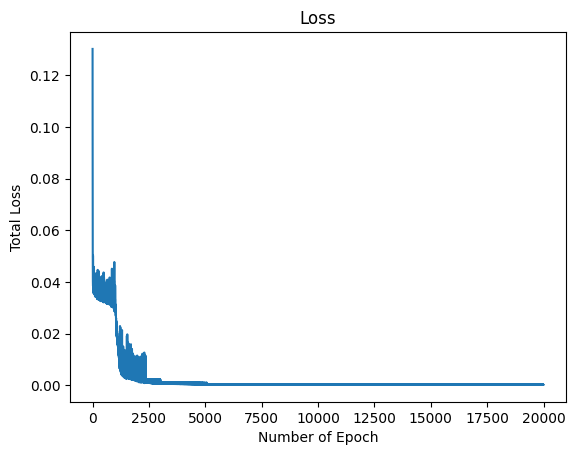

In [ ]:
plt.title("Loss")
plt.plot(loss_array)
#plt.plot(val_loss_array)
plt.ylabel('Total Loss')
plt.xlabel('Number of Epoch')
plt.show()

In [ ]:
def analytical_sol(w):
  #t=t*-1
  m = tf.subtract(tf.math.exp((1/c)*w),1.0)
  c_0 = tf.subtract(tf.math.exp(L/c),1.0)
  #c_1 = 7.20e10
  C = m/c_0*-1
  #(T_w-T_inf)
  y_analytical = tf.add(C,1.0)
  return y_analytical

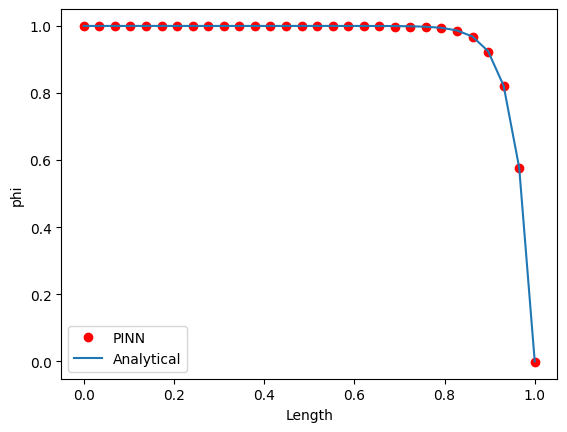

In [ ]:
t_p = tf.cast(np.linspace(0,L,30),tf.float32)
y_pred = model(t_p)
#print(t_p_1)

#t_p = np.linspace(0,1,20)*2
y_analytical = analytical_sol(t_p)
plt.plot(t_p,y_pred,'o',label='PINN',c="red")
plt.plot(t_p,y_analytical,label='Analytical')
plt.xlabel("Length")
plt.ylabel("phi")
#print(max(ypred),min(ypred))
plt.legend()

In [ ]:
model.save('my_model.h5')

In [ ]:
print(ddy_ddx)